In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

## Column Description
<B>DateTime: </B>String, defines date and time of sample<br/> 
<B>Holiday: </B>String, gives name of holiday if day is a bank holiday<br/>
<B>HolidayFlag: </B>integer, 1 if day is a bank holiday, zero otherwise<br/>
<B>DayOfWeek: </B>integer (0-6), 0 monday, day of week<br/>
<B>WeekOfYear: </B>integer, running week within year of this date<br/>
<B>Day integer: </B>day of the date<br/>
<B>Month integer: </B>month of the date<br/>
<B>Year integer: </B>year of the date<br/>
<B>PeriodOfDay integer: </B>denotes half hour period of day (0-47)<br/>
<B>ForecastWindProduction: </B>the forecasted wind production for this period<br/>
<B>SystemLoadEA: </B>the national load forecast for this period<br/>
<B>SMPEA: </B>the price forecast for this period<br/>
<B>ORKTemperature: </B>the actual temperature measured at Cork airport<br/>
<B>ORKWindspeed: </B>the actual windspeed measured at Cork airport<br/>
<B>CO2Intensity: </B>the actual CO2 intensity in (g/kWh) for the electricity produced<br/>
<B>ActualWindProduction: </B>the actual wind energy production for this period<br/>
<B>SystemLoadEP2: </B>the actual national system load for this period<br/>
<B>SMPEP2: </B>the actual price of this time period, the value to be forecasted

In [2]:
df=pd.read_csv('electricity_prices.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [4]:
df.drop(['DateTime','Holiday'],inplace=True,axis=1) #Drop Datetime and Holiday columns which are not useful

### ForecastWindProduction should be numeric value, but it's datatype here is object, so let's check what happend.

In [5]:
df['ForecastWindProduction']=df['ForecastWindProduction'].astype('str')

In [6]:
df[~df['ForecastWindProduction'].str.contains('[0-9]')]

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
17334,0,5,43,27,10,2012,8,?,2802.34,35.85,1.00,22.20,?,?,2642.11,39.39
24768,1,6,13,31,3,2013,2,?,?,?,?,?,?,?,?,?
24769,1,6,13,31,3,2013,3,?,?,?,?,?,?,?,?,?
24770,1,6,13,31,3,2013,4,?,3314.50,39.74,4.00,22.20,486.19,?,3220.34,63.07
24771,1,6,13,31,3,2013,5,?,3232.57,39.74,4.00,22.20,493.50,?,3076.47,39.74


### It shows that there are some columns containing "?". They should be imputed to the mean value of each column.

In [7]:
def clean(col):
    df[col]=df[col].astype('str')
    num_values=df[df[col].str.contains('[0-9]')][col]
    num_values=num_values.astype('float')
    alter=np.mean(num_values)
    new_col=df[col].apply(lambda x:alter if x=='?' else x).astype('float')
    return new_col

cols=list(df.columns)
for i in range(7,len(cols)):
    df[cols[i]]=clean(cols[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             38014 non-null  int64  
 1   DayOfWeek               38014 non-null  int64  
 2   WeekOfYear              38014 non-null  int64  
 3   Day                     38014 non-null  int64  
 4   Month                   38014 non-null  int64  
 5   Year                    38014 non-null  int64  
 6   PeriodOfDay             38014 non-null  int64  
 7   ForecastWindProduction  38014 non-null  float64
 8   SystemLoadEA            38014 non-null  float64
 9   SMPEA                   38014 non-null  float64
 10  ORKTemperature          38014 non-null  float64
 11  ORKWindspeed            38014 non-null  float64
 12  CO2Intensity            38014 non-null  float64
 13  ActualWindProduction    38014 non-null  float64
 14  SystemLoadEP2           38014 non-null

### After imputation, it shows all features are numeric values without null. The dataset is already cleaned.

## Use all the features as X and the prices as y. Split the dataset into training set and test set

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Use Random Forest model to train the data and make prediction

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

In [12]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [13]:
rf.score(X_test,y_test)

0.659989021226291

### Visualize the features importances

<AxesSubplot:>

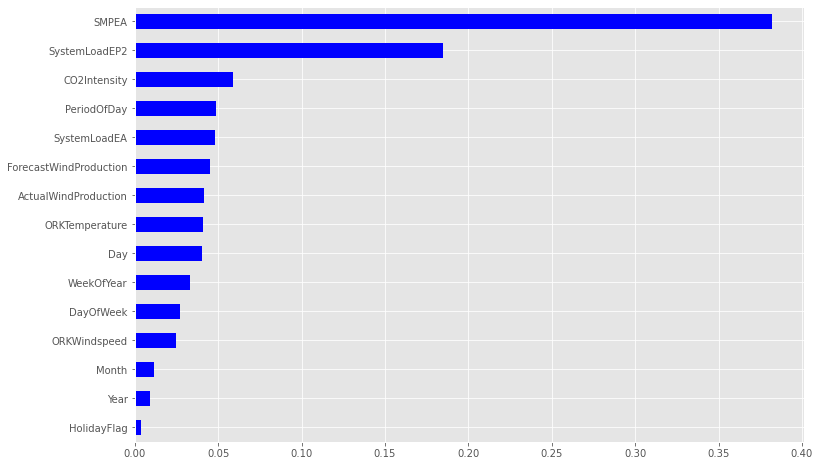

In [14]:
importances=pd.Series(data=rf.feature_importances_,index=X_train.columns)
importances=importances.sort_values()
importances.plot(kind='barh',color='blue')